In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import linalg

Import the dataset:

In [117]:
df = pd.read_csv("/home/u5586703/kdongray/MA930/Assignment2/Student_Performance.csv")

Plot a density histogram of the scores achieved:

In [218]:
#Calculate the sample mean 
df['Performance Index'].mean()

55.2248

In [219]:
#Calculate the sample variance
df['Performance Index'].var(ddof=1)

369.12237719771895

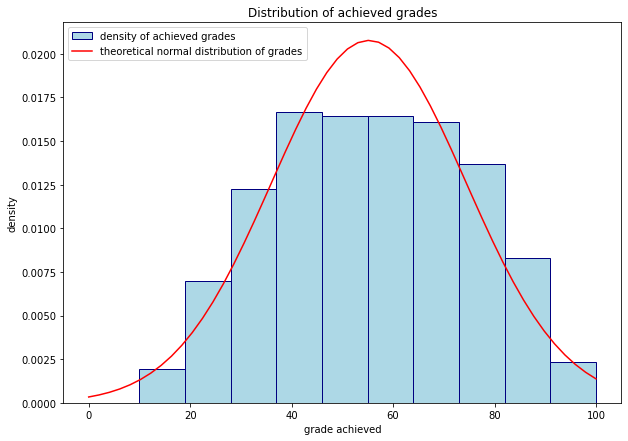

In [217]:
plt.figure(figsize=(10,7))

#Plot a density histogram of the scores
plt.hist(df["Performance Index"], density=True,label='density of achieved grades', color = "lightblue", ec="navy")
x=np.linspace(0,100,)
y = scipy.stats.norm.pdf(x, loc = 55.2248, scale = (np.sqrt(369.1)),)

#Plot the theoretical normal distribution
plt.plot(x,y, color="r", label='theoretical normal distribution of grades')
plt.xlabel('grade achieved')
plt.ylabel('density')
plt.title('Distribution of achieved grades')
plt.legend();

Group by hours studied:

In [209]:
study = df.groupby("Hours Studied")

#calculate mean grade per study amount
meanstudy = study["Performance Index"].mean()

print(meanstudy)

Hours Studied
1    44.116319
2    46.428571
3    49.776586
4    52.719816
5    55.516453
6    58.486320
7    60.233835
8    64.211397
9    65.725561
Name: Performance Index, dtype: float64


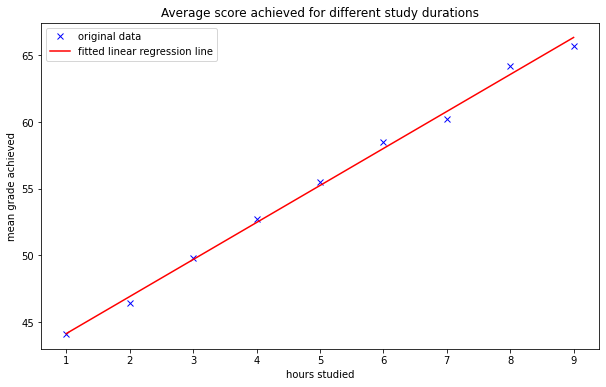

In [210]:
a=np.array([1,2,3,4,5,6,7,8,9])
b=np.array([44.116319,46.428571,49.776586,52.719816,55.516453,58.486320,60.233835,64.211397,65.725561])
model1 = scipy.stats.linregress(a, b)

plt.figure(figsize=(10,6))

#plot the data points
plt.plot(a, b, 'x' , color='blue',label='original data',)

#use linear regression to plot a line of best fit
plt.plot(a, model1.intercept + model1.slope*a, 'r', label='fitted linear regression line')
plt.xlabel('hours studied')
plt.ylabel('mean grade achieved')
plt.title('Average score achieved for different study durations')
plt.legend();

Group by hours slept:

In [211]:
sleep = df.groupby("Sleep Hours")

#calculate mean grade for each different sleep interval
meansleep = sleep["Performance Index"].mean()

print(meansleep);

Sleep Hours
4    53.794935
5    54.801370
6    54.660490
7    55.278043
8    55.932373
9    56.811344
Name: Performance Index, dtype: float64


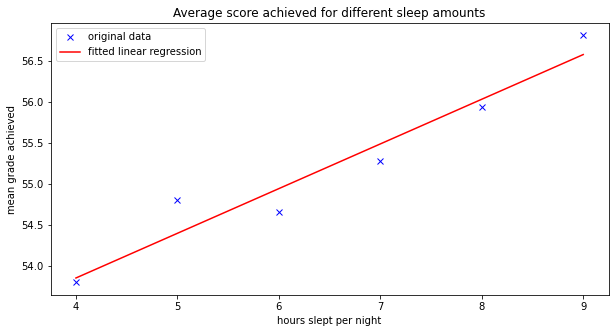

In [221]:
x=np.array([4,5,6,7,8,9])
y=np.array([53.794935,54.801370,54.660490,55.278043,55.932373,56.811344])
model2 = scipy.stats.linregress(x, y)

plt.figure(figsize=(10,5))

#plot our data points
plt.plot(x, y, 'x' , color='blue',label='original data',)

#use linear regression
plt.plot(x, model2.intercept + model2.slope*x, 'r', label='fitted linear regression')
plt.xlabel('hours slept per night')
plt.ylabel('mean grade achieved')
plt.title('Average score achieved for different sleep amounts')
plt.legend();

Group by number of practice papers:

In [213]:
prac = df.groupby("Sample Question Papers Practiced")

#calculate mean scores
meanprac = prac["Performance Index"].mean()

print(meanprac)

Sample Question Papers Practiced
0    52.946372
1    54.606339
2    55.264516
3    55.257005
4    54.148691
5    55.451362
6    56.147309
7    55.776089
8    55.454191
9    56.880114
Name: Performance Index, dtype: float64


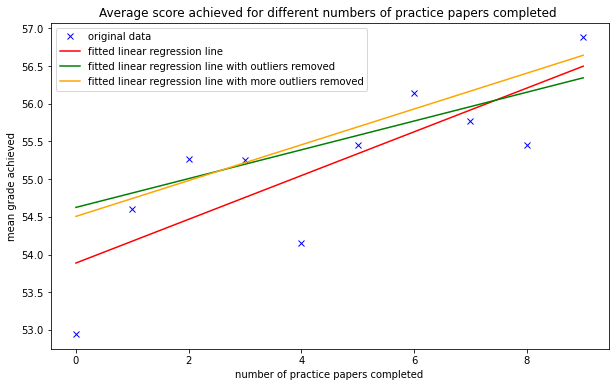

In [214]:
c=np.array([0,1,2,3,4,5,6,7,8,9])
d=np.array([52.946372,54.606339,55.264516,55.257005,54.148691,55.451362,56.147309,55.776089,55.454191,56.880114])
model3 = scipy.stats.linregress(c, d)

plt.figure(figsize=(10,6))

#plot the data points
plt.plot(c, d, 'x' , color='blue',label='original data',)

#use linear regression
plt.plot(c, model3.intercept + model3.slope*c, 'r', label='fitted linear regression line')

e=np.array([1,2,3,5,6,7,8,9])
g=np.array([0,1,2,3,5,6,7,8,9])
h=np.array([1,2,3,5,6,7,9])
f=np.array([54.606339,55.264516,55.257005,55.451362,56.147309,55.776089,55.454191,56.880114])
i=np.array([54.606339,55.264516,55.257005,55.451362,56.147309,55.776089,56.880114])
model4 = scipy.stats.linregress(e, f)
model5=scipy.stats.linregress(h, i)

#remove two outliers and plot a new line
plt.plot(g, model4.intercept + model4.slope*g, 'g', label='fitted linear regression line with outliers removed')

#remove a third outlier and plot another line
plt.plot(g, model5.intercept + model5.slope*g, color='orange', label='fitted linear regression line with more outliers removed')
plt.xlabel('number of practice papers completed')
plt.ylabel('mean grade achieved')
plt.title('Average score achieved for different numbers of practice papers completed ')
plt.legend();

Polynomial Regression:

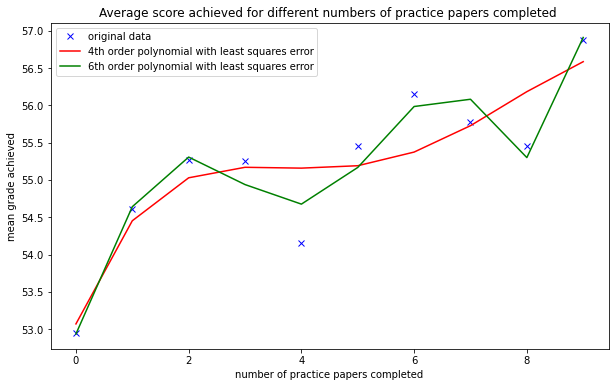

In [216]:
#Form our two matrices for a 4th order polynomial
l=np.array([[1,np.mean(c),np.mean(c**2),np.mean(c**3),np.mean(c**4)],
            [np.mean(c),np.mean(c**2),np.mean(c**3),np.mean(c**4),np.mean(c**5)],
            [np.mean(c**2),np.mean(c**3),np.mean(c**4),np.mean(c**5),np.mean(c**6)],
            [np.mean(c**3),np.mean(c**4),np.mean(c**5),np.mean(c**6),np.mean(c**7)],
            [np.mean(c**4),np.mean(c**5),np.mean(c**6),np.mean(c**7),np.mean(c**8)]])
m = np.array([[np.mean(d)],[np.mean(c*d)],[np.mean(d*(c**2))],[np.mean(d*(c**3))],[np.mean(d*(c**4))]])

#Calculate the k_{i} constants in our polynomial
n=scipy.linalg.solve(l,m)

#Construct the 4th order polynomial
u= n[4]*c**4 + n[3]*c**3 + n[2]*c**2 + n[1]*c + n[0]

#Form our two matrices for a 6th order polynomial
l2=np.array([[1,np.mean(c),np.mean(c**2),np.mean(c**3),np.mean(c**4),np.mean(c**5),np.mean(c**6)],
            [np.mean(c),np.mean(c**2),np.mean(c**3),np.mean(c**4),np.mean(c**5),np.mean(c**6),np.mean(c**7)],
            [np.mean(c**2),np.mean(c**3),np.mean(c**4),np.mean(c**5),np.mean(c**6),np.mean(c**7),np.mean(c**8)],
            [np.mean(c**3),np.mean(c**4),np.mean(c**5),np.mean(c**6),np.mean(c**7),np.mean(c**8),np.mean(c**9)],
            [np.mean(c**4),np.mean(c**5),np.mean(c**6),np.mean(c**7),np.mean(c**8),np.mean(c**9),np.mean(c**10)],
            [np.mean(c**5),np.mean(c**6),np.mean(c**7),np.mean(c**8),np.mean(c**9),np.mean(c**10),np.mean(c**11)],
            [np.mean(c**6),np.mean(c**7),np.mean(c**8),np.mean(c**9),np.mean(c**10),np.mean(c**11),np.mean(c**12)]])
m2 = np.array([[np.mean(d)],[np.mean(c*d)],[np.mean(d*(c**2))],[np.mean(d*(c**3))],[np.mean(d*(c**4))],[np.mean(d*(c**5))],[np.mean(d*(c**6))]])

#Calculate the k_{j} constants in our polynomial
o=scipy.linalg.solve(l2,m2)

#Construct the 6th order polynomial
u2= o[6]*c**6 + o[5]*c**5 + o[4]*c**4 + o[3]*c**3 + o[2]*c**2 + o[1]*c + o[0]

#Plot both polynomials with our original data points
plt.figure(figsize=(10,6))
plt.plot(c, d, 'x' , color='blue',label='original data',)
plt.plot(c,u, color='red', label='4th order polynomial with least squares error')
plt.plot(c,u2, color='green', label='6th order polynomial with least squares error')
plt.xlabel('number of practice papers completed')
plt.ylabel('mean grade achieved')
plt.title('Average score achieved for different numbers of practice papers completed ')
plt.legend();

Create a smaller dataset including only those that study 1-4 hours:

In [231]:
df2 = df[df['Hours Studied'] <5]

In [222]:
#Calculate the new sample mean
mean2=df2["Performance Index"].mean()
print(mean2)

48.209412294528256


In [223]:
#Calculate the new sample variance
var2=df2["Performance Index"].var(ddof=1)
print(var2)

329.47595643380305


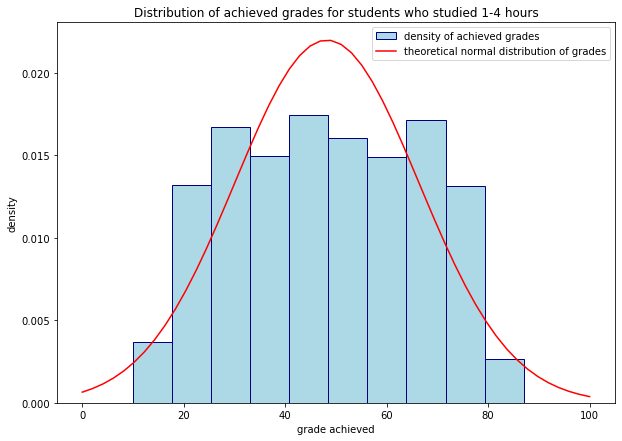

In [102]:
plt.figure(figsize=(10,7))

#Plot a density histogram
plt.hist(df2["Performance Index"], density=True,label='density of achieved grades', color = "lightblue", ec="navy")

#Plot the theoretical distribution
x=np.linspace(0,100,)
y = scipy.stats.norm.pdf(x, loc = 48.209412294528256, scale = (np.sqrt(329.47595643380305)),)
plt.plot(x,y, color="r", label='theoretical normal distribution of grades')
plt.xlabel('grade achieved')
plt.ylabel('density')
plt.title('Distribution of achieved grades for students who studied 1-4 hours')
plt.legend();

Create another dataset including only those that study 6-9 hours:

In [226]:
df3 = df[df['Hours Studied'] >5]

In [227]:
#Calculate the sample mean
mean3=df3["Performance Index"].mean()
print(mean3)

62.131019036954086


In [228]:
var3=df3["Performance Index"].var(ddof=1)
print(var3)

326.53950579376846


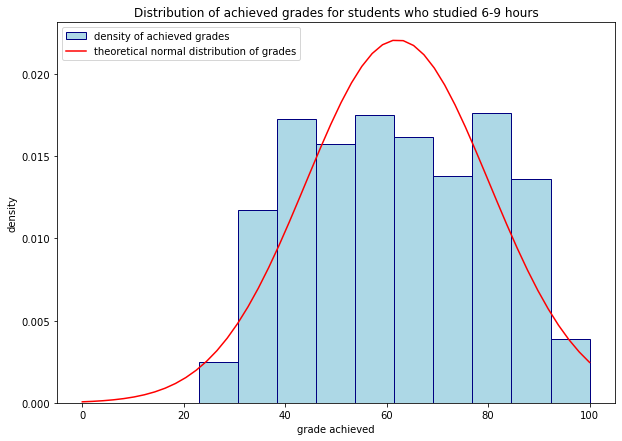

In [229]:
plt.figure(figsize=(10,7))
#Plot a density histogram of scores
plt.hist(df3["Performance Index"], density=True,label='density of achieved grades', color = "lightblue", ec="navy")

#Plot the theoretical distribution
x=np.linspace(0,100,)
y = scipy.stats.norm.pdf(x, loc = 62.131019036954086, scale = (np.sqrt(326.53950579376846)),)
plt.plot(x,y, color="r", label='theoretical normal distribution of grades')
plt.xlabel('grade achieved')
plt.ylabel('density')
plt.title('Distribution of achieved grades for students who studied 6-9 hours')
plt.legend();

In [116]:
#Find number of samples in df hrs studied = 1-4
len(df2)

4441

In [230]:
#Find number of samples in df hrs studied = 6-9
len(df3)

4465

Calculate the z statistic:

In [112]:
(mean3 - mean2)/(np.sqrt(var3/4465 + var2/4441))

36.27057788399602

Calculate the p value:

In [113]:
p = scipy.stats.norm.sf(abs(36.27057788399602))*2
print(p)

4.709302593254938e-288
